# DSA4264 Project

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rhyde\AppData\Roaming\nltk_data...


In [42]:
clean_data = pd.read_csv('./data/combined_cleaned_500k.csv',  lineterminator='\n', encoding='utf8')

In [44]:
# Preprocessing function
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)


# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, stop_words='english', min_df=1, max_features = 500)

# Fit and transform the data
clean_data['text'] = clean_data['text'].fillna('')
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_data['text'].values)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.A, columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)

C:\Users\rhyde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


        able  account  act  action  actual  actually  add       age  ago  \
0        0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
1        0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
2        0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
3        0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
4        0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
...      ...      ...  ...     ...     ...       ...  ...       ...  ...   
396293   0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
396294   0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
396295   0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   
396296   0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.180845  0.0   
396297   0.0      0.0  0.0     0.0     0.0       0.0  0.0  0.000000  0.0   

        agree  ...  wouldnt  wow   wp  wrong  yeah  year  yes  youll  young  \
0       

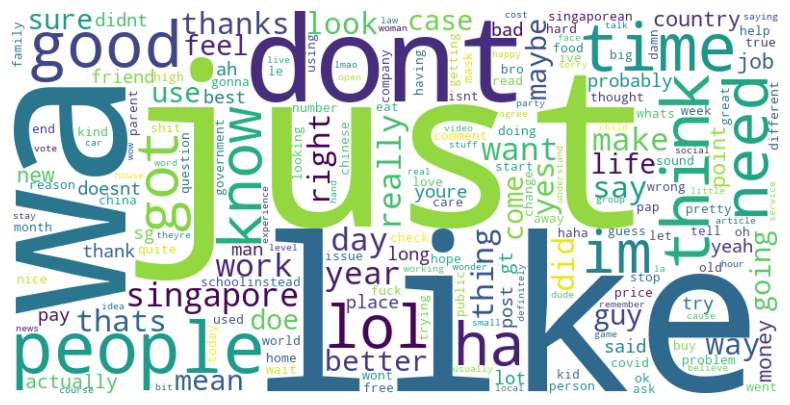

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_matrix.sum(axis=0)

# Create a DataFrame to hold the words and their corresponding scores
words = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_sum.A1  # Convert to a 1D array

# Create a dictionary mapping words to their TF-IDF scores
word_scores = dict(zip(words, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [46]:
wordcloud.to_file("wordcloud.png")